In [50]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans,kmeans_plusplus
import seaborn as sns
from datetime import datetime,timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from scipy.stats import multivariate_normal
import cv2 as cv
from itertools import chain
from matplotlib.patches import Ellipse
from sklearn.cluster import MeanShift, estimate_bandwidth

sns.set_context('notebook')
sns.set_style('white')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

In [ ]:
def image_seg

In [2]:
img = plt.imread('gauss-cat.jpeg')

In [3]:
img.shape

(1920, 1591, 3)

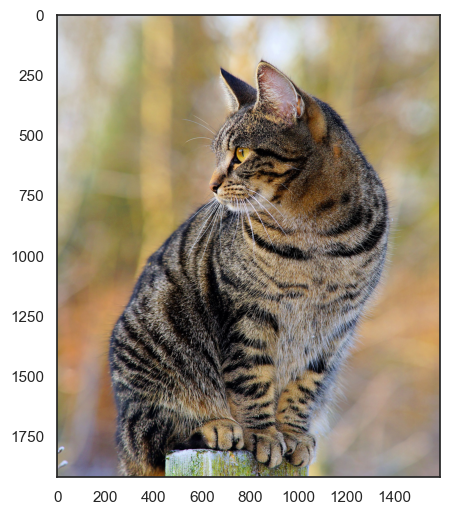

In [4]:
plt.figure(figsize=(6,6))
plt.imshow(img)

In [5]:
X = img.reshape(-1, 3)

In [6]:
X.shape

(3054720, 3)

In [7]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca.shape

(3054720, 3)

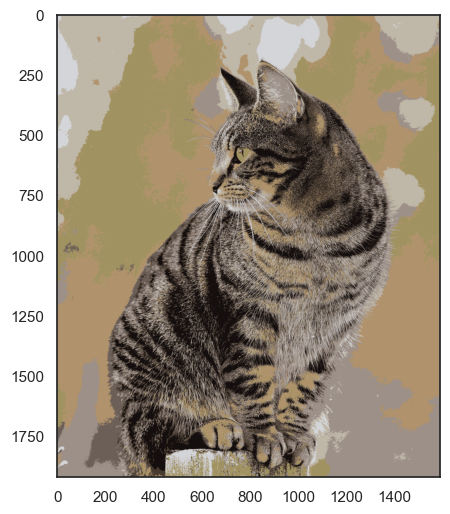

In [10]:
n = 8
data = X_pca
gmm = GaussianMixture(n_components=n, covariance_type='tied')
gmm.fit(data)
labels = gmm.predict(data)
seg = np.zeros(data.shape) # num of pixels x 3

for label in range(n):
    seg[labels == label] = gmm.means_[label]

seg = pca.inverse_transform(seg)
seg = seg.reshape(img.shape).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(seg)

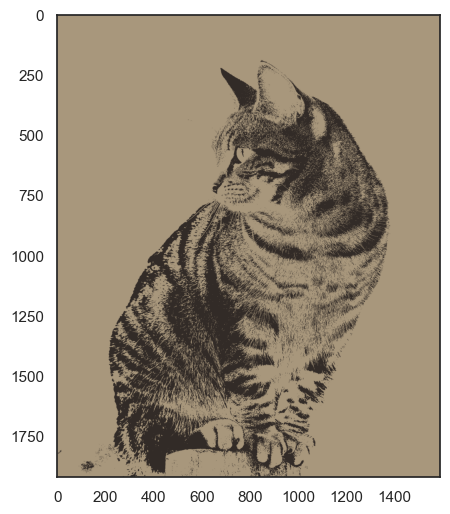

In [11]:
n = 2
data = X
gmm = GaussianMixture(n_components=n, covariance_type='tied')
gmm.fit(data)
labels = gmm.predict(data)
seg = np.zeros(data.shape) # num of pixels x 3

for label in range(n):
    seg[labels == label] = gmm.means_[label]

seg = seg.reshape(img.shape).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(seg)

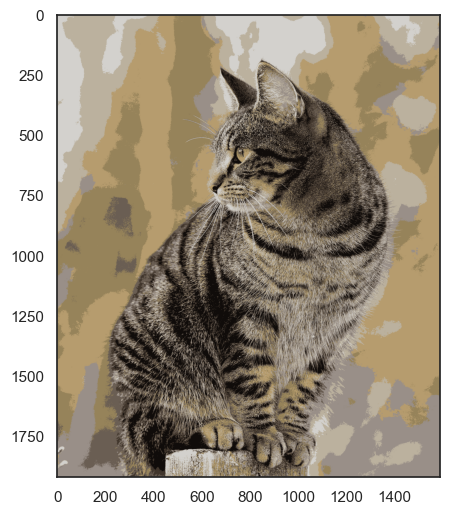

In [12]:
k=8
data = X
km = KMeans(n_clusters=k, random_state=123)
km.fit(data)
seg = np.zeros(data.shape)
for i in range(k):
    seg[km.labels_ == i] = km.cluster_centers_[i]
    
seg = seg.reshape(img.shape).astype(np.uint8)
plt.figure(figsize=(6,6))
plt.imshow(seg)

20.393726098818068


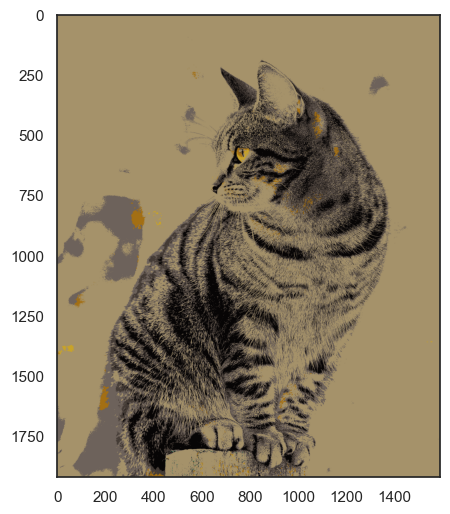

In [13]:
data = X

bandwidth = estimate_bandwidth(data, quantile=.04, n_samples=3000)
print(bandwidth)

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(data)
cluster_int8=np.uint8(ms.cluster_centers_)

result=np.zeros(data.shape,dtype=np.uint8)
labeled = ms.labels_
for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
result=result.reshape(img.shape)
plt.figure(figsize=(6,6))
plt.imshow(result)

10.726059733692313


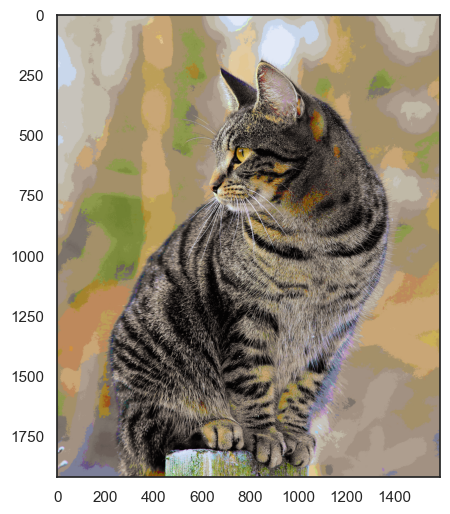

In [12]:
data = X
bandwidth = estimate_bandwidth(data, quantile=.009, n_samples=3000)
print(bandwidth)
ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)
ms.fit(data)
cluster_int8=np.uint8(ms.cluster_centers_)

result=np.zeros(data.shape,dtype=np.uint8)
labeled = ms.labels_
for label in np.unique(labeled):
    result[labeled==label,:]=cluster_int8[label,:]    
    
result=result.reshape(img.shape)
plt.figure(figsize=(6,6))
plt.imshow(result)

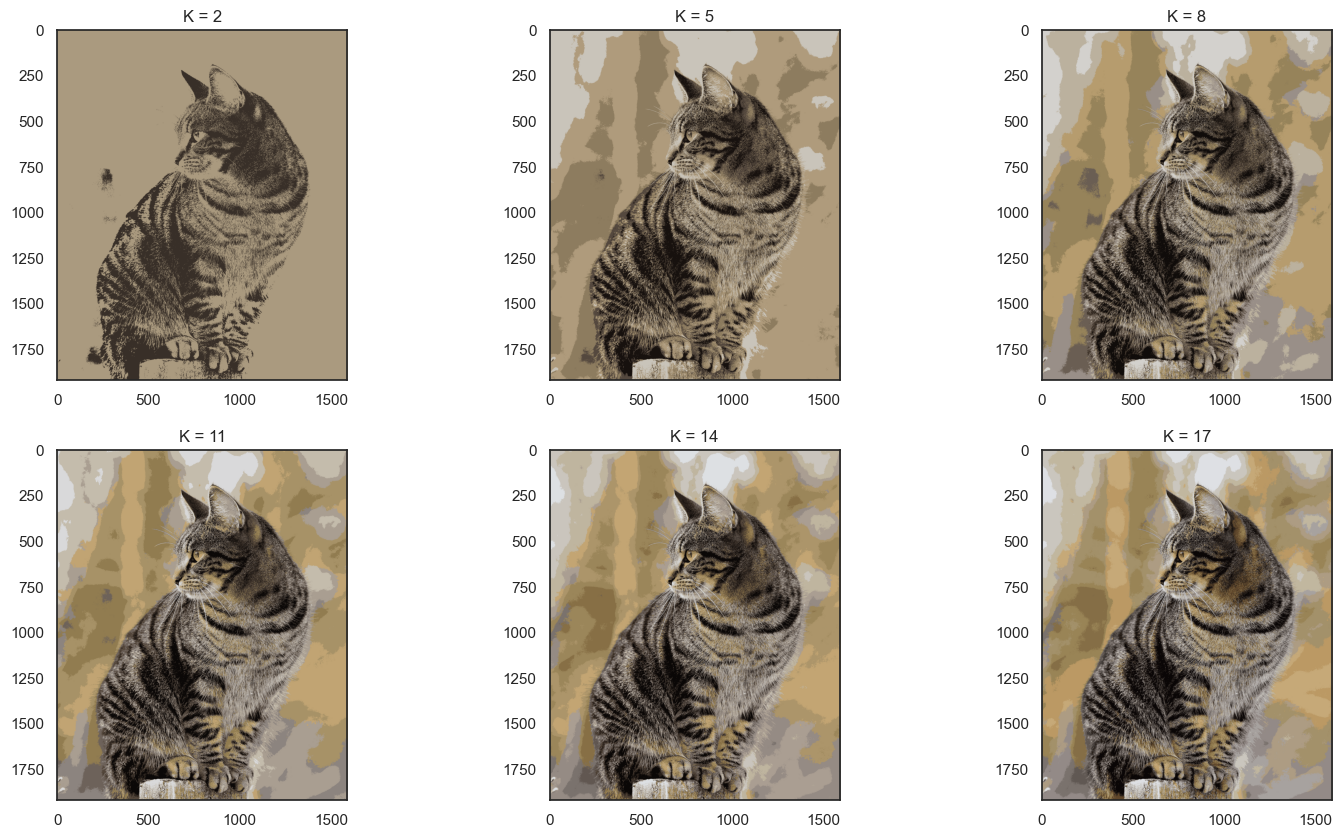

In [52]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(18,10)
data = X
axn = 0
kmean_result =[]
for x in range(2,20,3):
    t1 = datetime.now()
    km = KMeans(n_clusters=x, random_state=123)
    km.fit(data)
    seg = np.zeros(data.shape)
    for i in range(x):
        seg[km.labels_ == i] = km.cluster_centers_[i]
    seg = seg.reshape(img.shape).astype(np.uint8)
    kmean_result.append({'img':seg,'#k':x ,'run_time' : datetime.now()-t1})
    axList[axn].imshow(seg)
    axList[axn].set_title('K = {}'.format(x))
    axn+=1

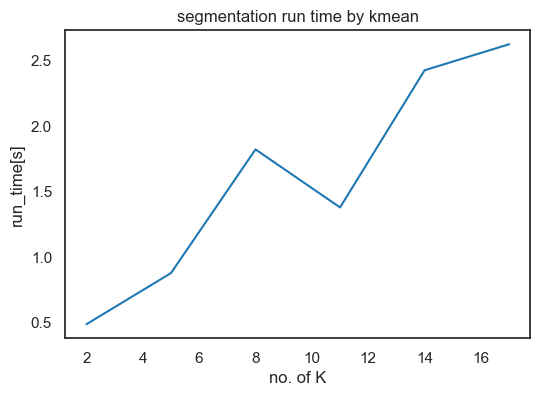

In [103]:
kmean_df = pd.DataFrame(kmean_result)
t2 = kmean_df['run_time'].max()
kmean_df['run_time'] = kmean_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=kmean_df[['#k','run_time']],x='#k',y='run_time')
plt.ylabel('run_time[s]')
plt.xlabel('no. of K')
plt.title('segmentation run time by kmean')
plt.show()

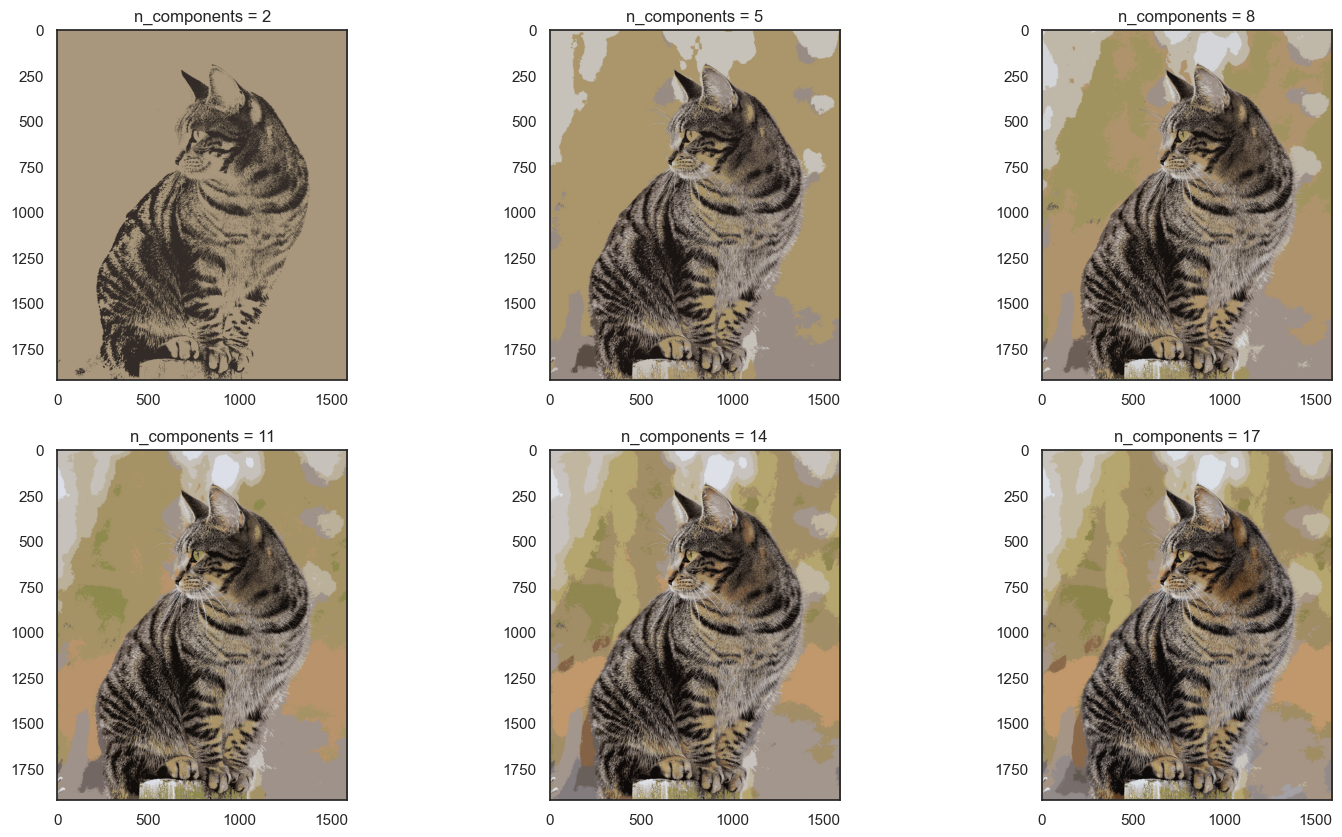

In [99]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(18,10)
data = X
axn = 0
gmm_result = []
for x in range(2,20,3):
    t1 = datetime.now()
    gmm = GaussianMixture(n_components=x, covariance_type='tied')
    gmm.fit(data)
    labels = gmm.predict(data)
    seg = np.zeros(data.shape)
    for label in range(x):
        seg[labels == label] = gmm.means_[label]
    
    seg = seg.reshape(img.shape).astype(np.uint8)
    gmm_result.append( { 'img':seg,'n_components' : x ,'run_time' : datetime.now()-t1 } )
    axList[axn].imshow(seg)
    axList[axn].set_title('n_components = {}'.format(x))
    axn+=1

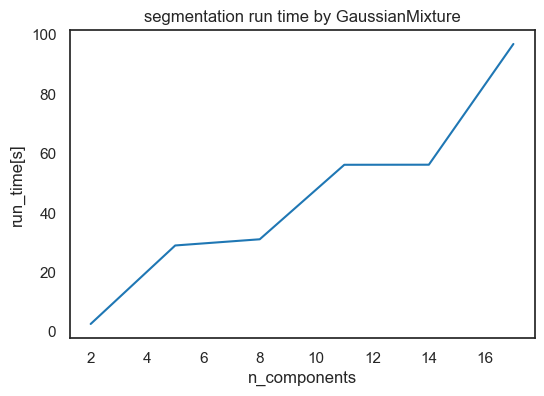

In [104]:
gmm_df = pd.DataFrame(gmm_result)
gmm_df['run_time'] = gmm_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=gmm_df[['n_components','run_time']],x='n_components',y='run_time')
plt.ylabel('run_time[s]')
plt.xlabel('n_components')
plt.title('segmentation run time by GaussianMixture')
plt.show()

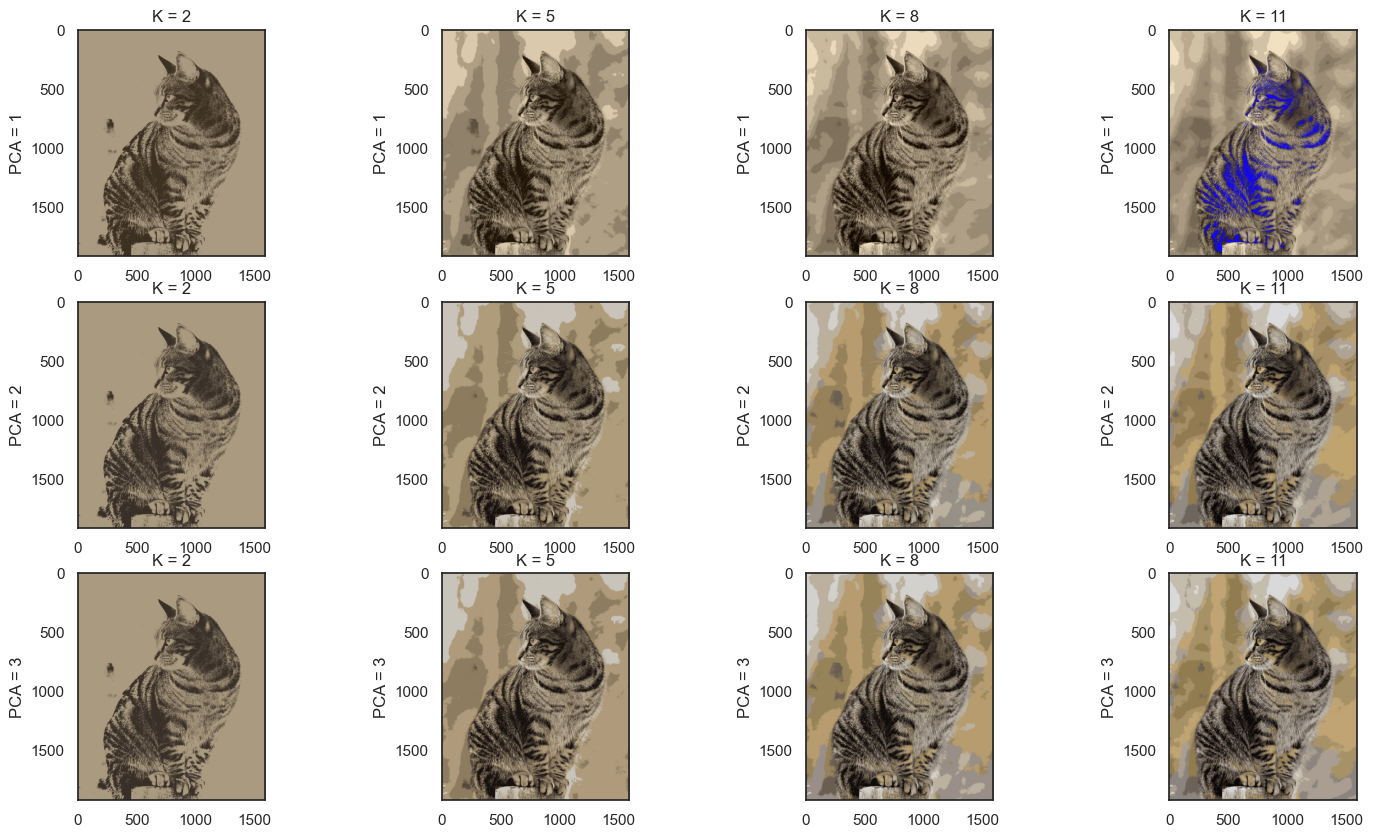

In [115]:
fig, axList = plt.subplots(nrows=3 ,ncols=4)
axList = axList.flatten()
fig.set_size_inches(18,10)
axn = 0
km_pca_result = []
for y in range(1,4,1):
    for x in range(2,13,3):
        t1 = datetime.now()
        data = X
        pca = PCA(n_components=y)
        data = pca.fit_transform(data)
        km = KMeans(n_clusters=x, random_state=123)
        km.fit(data)
        seg = np.zeros(data.shape)
        for i in range(x):
            seg[km.labels_ == i] = km.cluster_centers_[i]
        seg = pca.inverse_transform(seg)
        seg = seg.reshape(img.shape).astype(np.uint8)
        km_pca_result.append({ 'img':seg , '#k':x , 'pca':y , 'run_time' : datetime.now()-t1 })
        axList[axn].imshow(seg)
        axList[axn].set_ylabel('PCA = {}'.format(y) )
        axList[axn].set_title('K = {}'.format(x))
        axn+=1

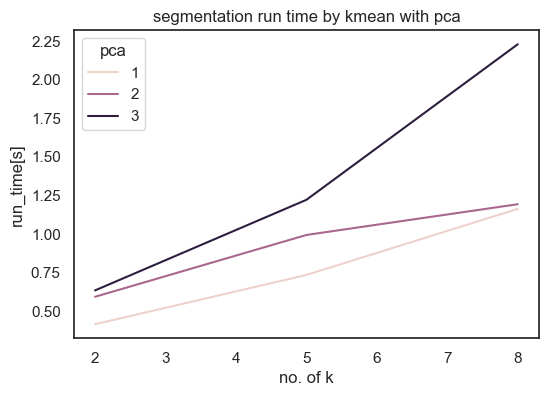

In [108]:
km_pca_df = pd.DataFrame(km_pca_result)
km_pca_df['run_time'] = km_pca_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=km_pca_df,x='#k',y='run_time',hue='pca')
plt.ylabel('run_time[s]')
plt.xlabel('no. of k')
plt.title('segmentation run time by kmean with pca')
plt.show()

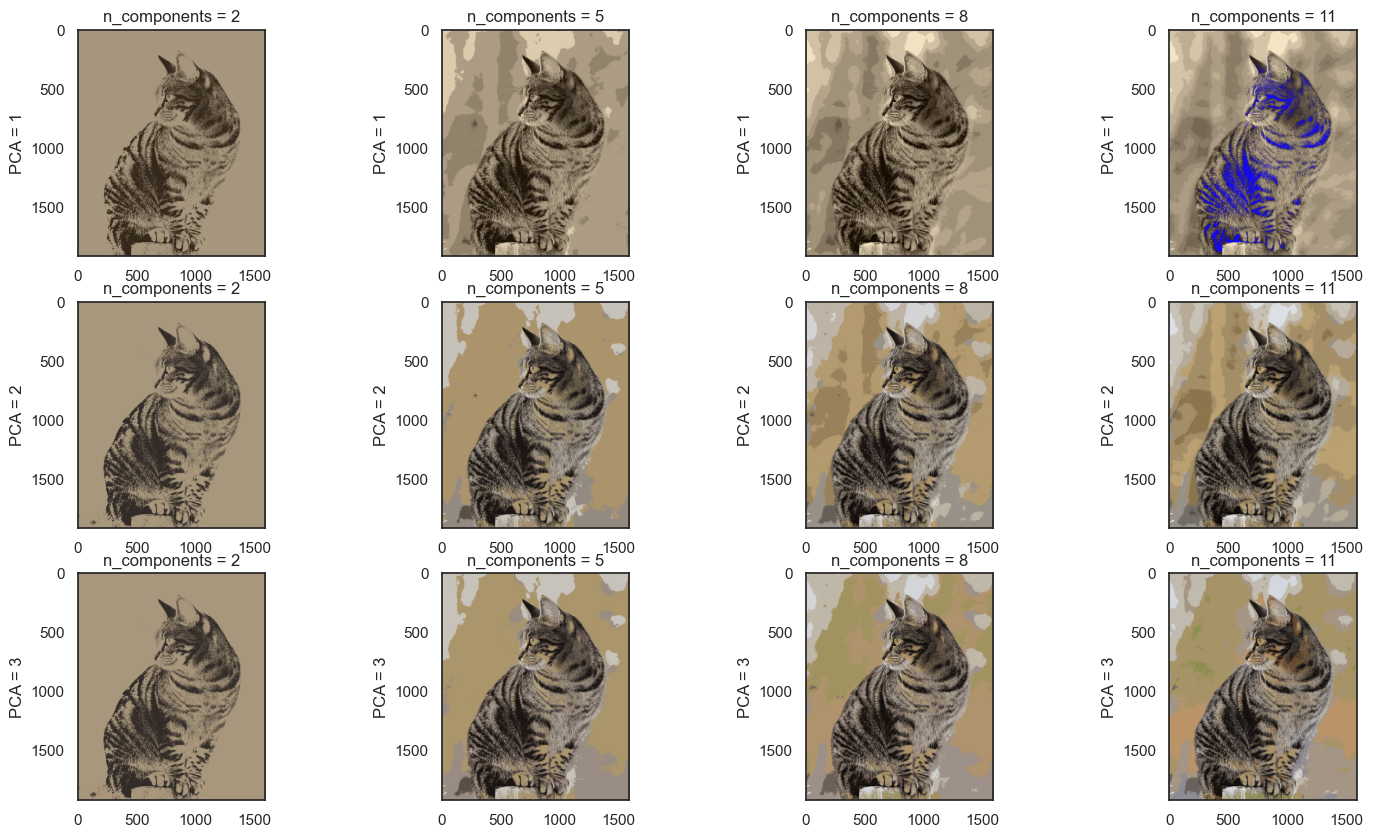

In [111]:
fig, axList = plt.subplots(nrows=3 ,ncols=4)
axList = axList.flatten()
fig.set_size_inches(18,10)
axn = 0
gmm_pca_result = []
for y in range(1,4,1):
    for x in range(2,13,3):
        t1 = datetime.now()
        data = X
        pca = PCA(n_components=y)
        data = pca.fit_transform(data)
        gmm = GaussianMixture(n_components=x, covariance_type='tied')
        gmm.fit(data)
        labels = gmm.predict(data)
        seg = np.zeros(data.shape)
        for label in range(x):
            seg[labels == label] = gmm.means_[label]
        seg = pca.inverse_transform(seg)
        seg = seg.reshape(img.shape).astype(np.uint8)
        gmm_pca_result.append({'img':seg,'n_components' : x , 'pca' : y, 'run_time' : datetime.now()-t1 })
        axList[axn].imshow(seg)
        axList[axn].set_ylabel('PCA = {}'.format(y) )
        axList[axn].set_title('n_components = {}'.format(x))
        axn+=1

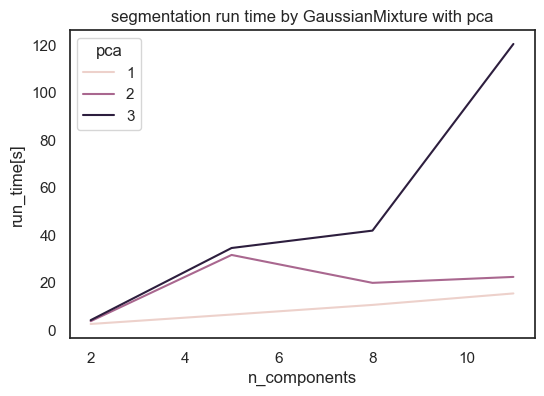

In [112]:
gmm_pca_df = pd.DataFrame(gmm_pca_result)
gmm_pca_df['run_time'] = gmm_pca_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=gmm_pca_df,x='n_components',y='run_time',hue='pca')
plt.ylabel('run_time[s]')
plt.xlabel('n_components')
plt.title('segmentation run time by GaussianMixture with pca')
plt.show()

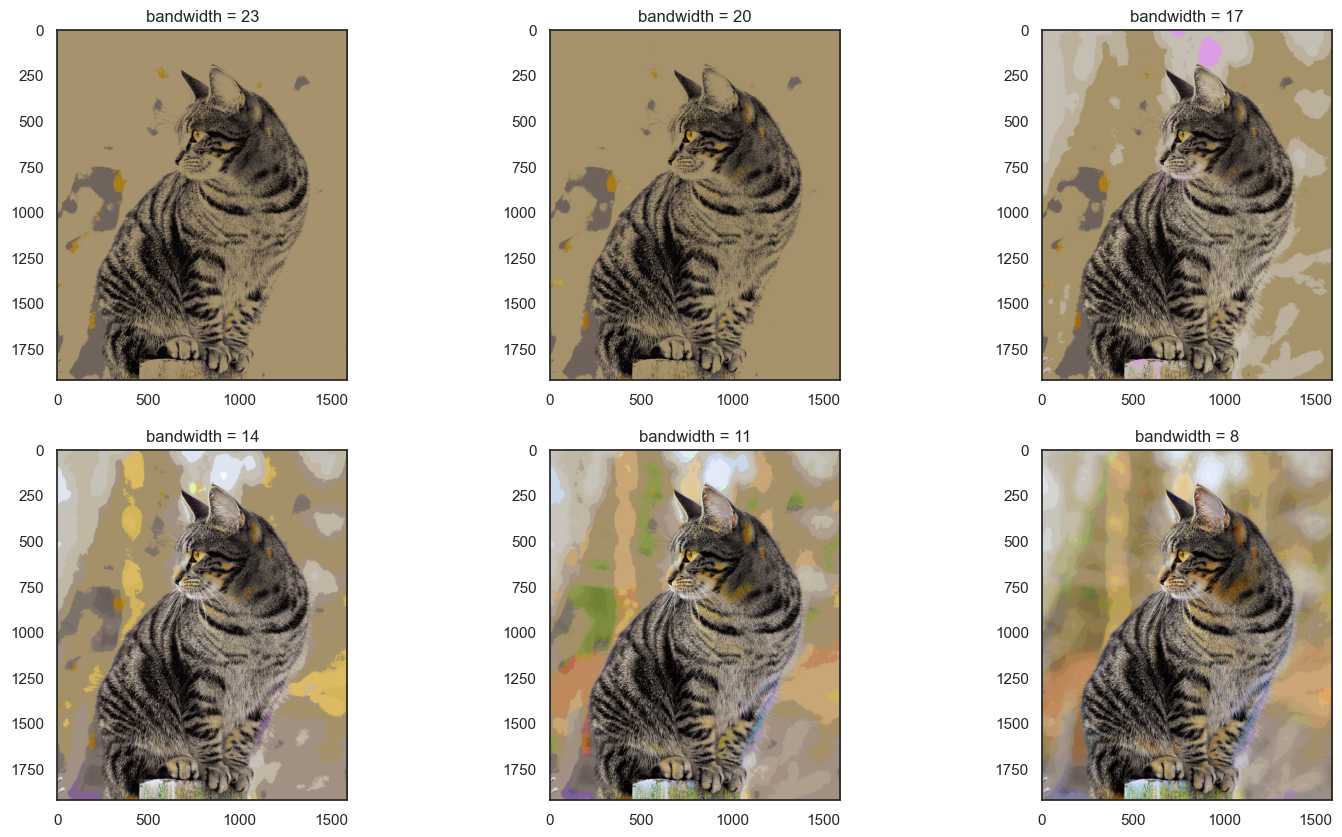

In [113]:
fig, axList = plt.subplots(nrows=2, ncols=3)
axList = axList.flatten()
fig.set_size_inches(18,10)
data = X
axn = 0
ms_result = []
for x in range(23,6,-3):
    t1=datetime.now()
    ms = MeanShift(bandwidth=x,bin_seeding=True)
    ms.fit(data)
    cluster_int8=np.uint8(ms.cluster_centers_)
    result=np.zeros(data.shape,dtype=np.uint8)
    labeled = ms.labels_
    for label in np.unique(labeled):
        result[labeled==label,:]=cluster_int8[label,:] 
        
    result=result.reshape(img.shape)
    ms_result.append({'img':result,'bandwidth':x,'run_time': datetime.now()-t1 })
    axList[axn].imshow(result)
    axList[axn].set_title('bandwidth = {}'.format(x))
    axn+=1

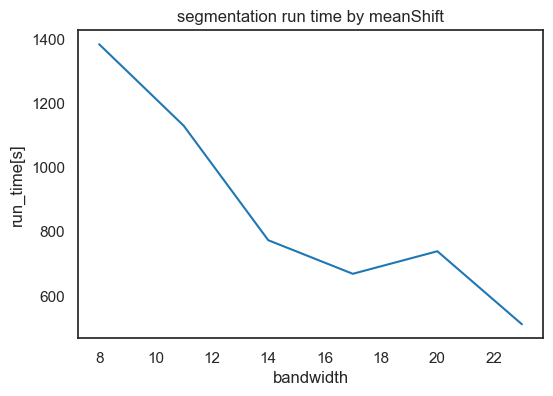

In [114]:
ms_df = pd.DataFrame(ms_result)
ms_df['run_time'] = ms_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=ms_df[['bandwidth','run_time']],x='bandwidth',y='run_time')
plt.ylabel('run_time[s]')
plt.xlabel('bandwidth')
plt.title('segmentation run time by meanShift')
plt.show()

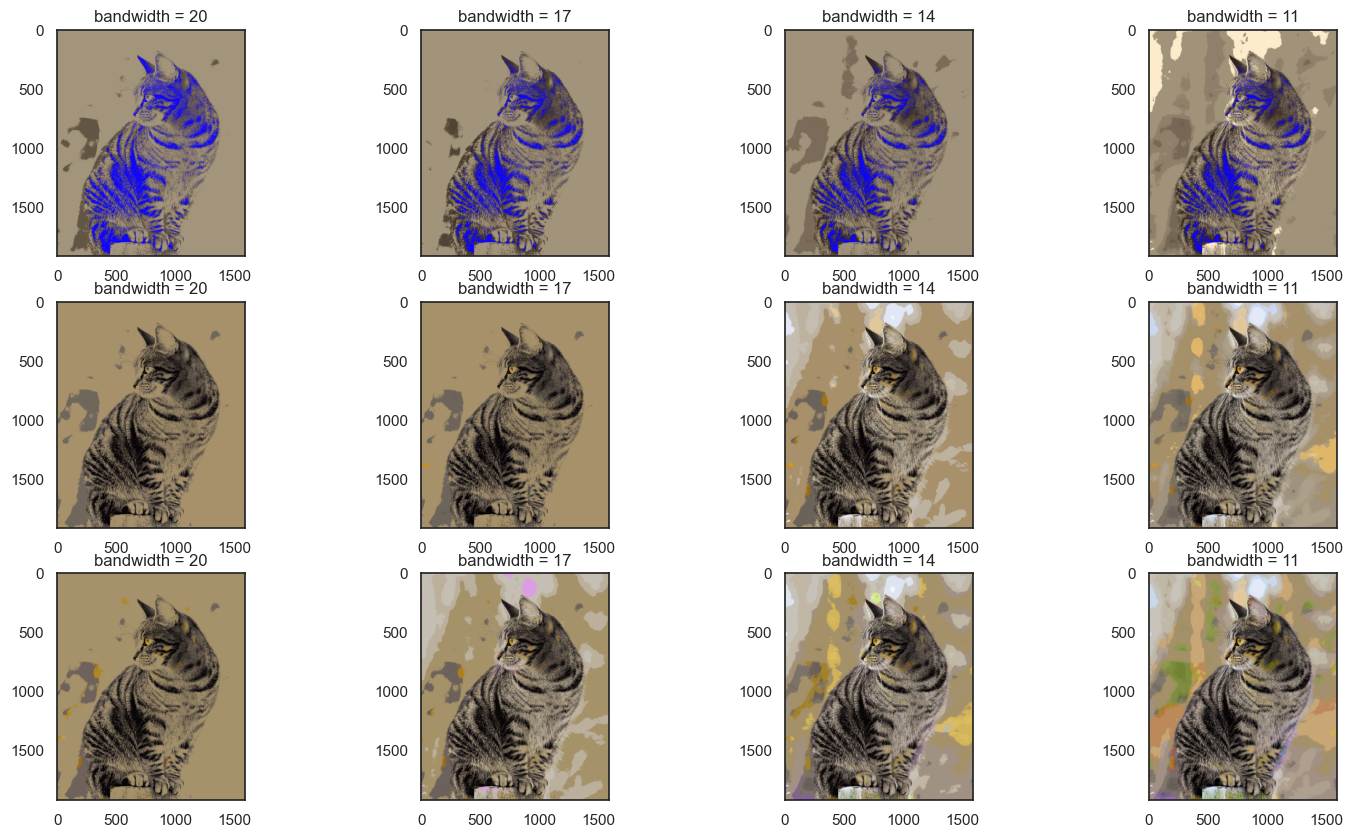

In [122]:
fig, axList = plt.subplots(nrows=3, ncols=4)
axList = axList.flatten()
fig.set_size_inches(18,10)
axn = 0
ms_pca_result = []
for y in range(1,4,1):
    for x in range(20,10,-3):
        t1=datetime.now()
        pca = PCA(n_components=y)
        data = pca.fit_transform(X)
        ms = MeanShift(bandwidth=x,bin_seeding=True)
        ms.fit(data)
        cluster_=ms.cluster_centers_
        result=np.zeros(data.shape)
        labeled = ms.labels_
        for label in np.unique(labeled):
            result[labeled==label,:]=cluster_[label,:] 

        result = pca.inverse_transform(result)
        result = np.uint8(result)
        result=result.reshape(img.shape)
        ms_pca_result.append({'img':result,'bandwidth':x, 'PCA' : y,'run_time': datetime.now()-t1 })
        axList[axn].imshow(result)
        axList[axn].set_title('bandwidth = {}'.format(x))
        axn+=1

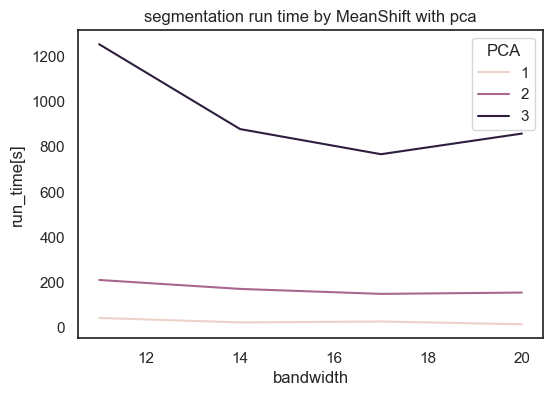

In [126]:
ms_pca_df = pd.DataFrame(ms_pca_result)
ms_pca_df['run_time'] = ms_pca_df[['run_time']].applymap(lambda x : x.total_seconds())
plt.figure(figsize=(6,4))
sns.lineplot(data=ms_pca_df,x='bandwidth',y='run_time',hue='PCA')
plt.ylabel('run_time[s]')
plt.xlabel('bandwidth')
plt.title('segmentation run time by MeanShift with pca')
plt.show()